In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
combine = [train_data, test_data]

In [3]:
pd.set_option('display.max_rows',None)
for df in combine:
    print([x for x in df.columns if df[x].isnull().sum()>0])
    print()

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']



Just missing data:
LotFrontage, MasVnrArea, Electrical

The missing data means something:  
Alley: no alley access  
MasVnrType: none  
Bsmt...: no basement  
FireplaceQu: no fireplace  
Garage...: no garage  
PoolQC: no pool  
Fence: no fence  
MiscFeature: no other features  

In [4]:
pd.set_option('display.max_rows',None)
train_data.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [8]:
cv = train_data['LotFrontage'].isnull()
nullot = cv[cv >0].index.tolist()
for x in nullot:
    print(train_data.loc[x,['LotFrontage','LotArea']])
    print()

LotFrontage      NaN
LotArea        10382
Name: 7, dtype: object

LotFrontage      NaN
LotArea        12968
Name: 12, dtype: object

LotFrontage      NaN
LotArea        10920
Name: 14, dtype: object

LotFrontage      NaN
LotArea        11241
Name: 16, dtype: object

LotFrontage     NaN
LotArea        8246
Name: 24, dtype: object

LotFrontage     NaN
LotArea        8544
Name: 31, dtype: object

LotFrontage     NaN
LotArea        9180
Name: 42, dtype: object

LotFrontage     NaN
LotArea        9200
Name: 43, dtype: object

LotFrontage      NaN
LotArea        13869
Name: 50, dtype: object

LotFrontage     NaN
LotArea        9375
Name: 64, dtype: object

LotFrontage      NaN
LotArea        19900
Name: 66, dtype: object

LotFrontage     NaN
LotArea        8475
Name: 76, dtype: object

LotFrontage     NaN
LotArea        8530
Name: 84, dtype: object

LotFrontage     NaN
LotArea        9765
Name: 95, dtype: object

LotFrontage      NaN
LotArea        10603
Name: 100, dtype: object

LotFrontage

Name: 1084, dtype: object

LotFrontage     NaN
LotArea        1974
Name: 1086, dtype: object

LotFrontage     NaN
LotArea        3696
Name: 1097, dtype: object

LotFrontage     NaN
LotArea        8063
Name: 1108, dtype: object

LotFrontage     NaN
LotArea        8000
Name: 1110, dtype: object

LotFrontage     NaN
LotArea        7750
Name: 1116, dtype: object

LotFrontage     NaN
LotArea        8926
Name: 1122, dtype: object

LotFrontage     NaN
LotArea        9125
Name: 1124, dtype: object

LotFrontage     NaN
LotArea        9819
Name: 1138, dtype: object

LotFrontage      NaN
LotArea        10304
Name: 1141, dtype: object

LotFrontage     NaN
LotArea        9000
Name: 1143, dtype: object

LotFrontage      NaN
LotArea        11200
Name: 1146, dtype: object

LotFrontage     NaN
LotArea        5700
Name: 1148, dtype: object

LotFrontage     NaN
LotArea        5890
Name: 1153, dtype: object

LotFrontage      NaN
LotArea        13700
Name: 1154, dtype: object

LotFrontage      NaN
LotArea 

In [9]:
cv = train_data['MasVnrArea'].isnull()
nulmas = cv[cv >0].index.tolist()
for x in nulmas:
    print(train_data.loc[x,['MasVnrArea','MasVnrType']])
    print()

MasVnrArea    NaN
MasVnrType    NaN
Name: 234, dtype: object

MasVnrArea    NaN
MasVnrType    NaN
Name: 529, dtype: object

MasVnrArea    NaN
MasVnrType    NaN
Name: 650, dtype: object

MasVnrArea    NaN
MasVnrType    NaN
Name: 936, dtype: object

MasVnrArea    NaN
MasVnrType    NaN
Name: 973, dtype: object

MasVnrArea    NaN
MasVnrType    NaN
Name: 977, dtype: object

MasVnrArea    NaN
MasVnrType    NaN
Name: 1243, dtype: object

MasVnrArea    NaN
MasVnrType    NaN
Name: 1278, dtype: object



In [10]:
y = train_data['SalePrice']
X = train_data.drop('SalePrice', axis=1)
X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(exclude=['object'])
cat_test = test_data.select_dtypes(include=['object'])
num_test = test_data.select_dtypes(exclude=['object'])

In [11]:
print("category:", X_cat.columns.tolist())
print("")
print("number:", X_num.columns.tolist())
print("")
print("missing data: LotFrontage, MasVnrArea, Electrical")

category: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

number: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF

The columns in X_num but actually it means category:
MSSubClass, OverallQual, OverallCond

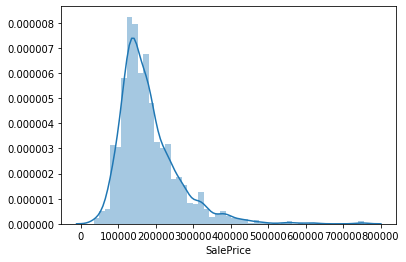

In [12]:
sns.distplot(y)

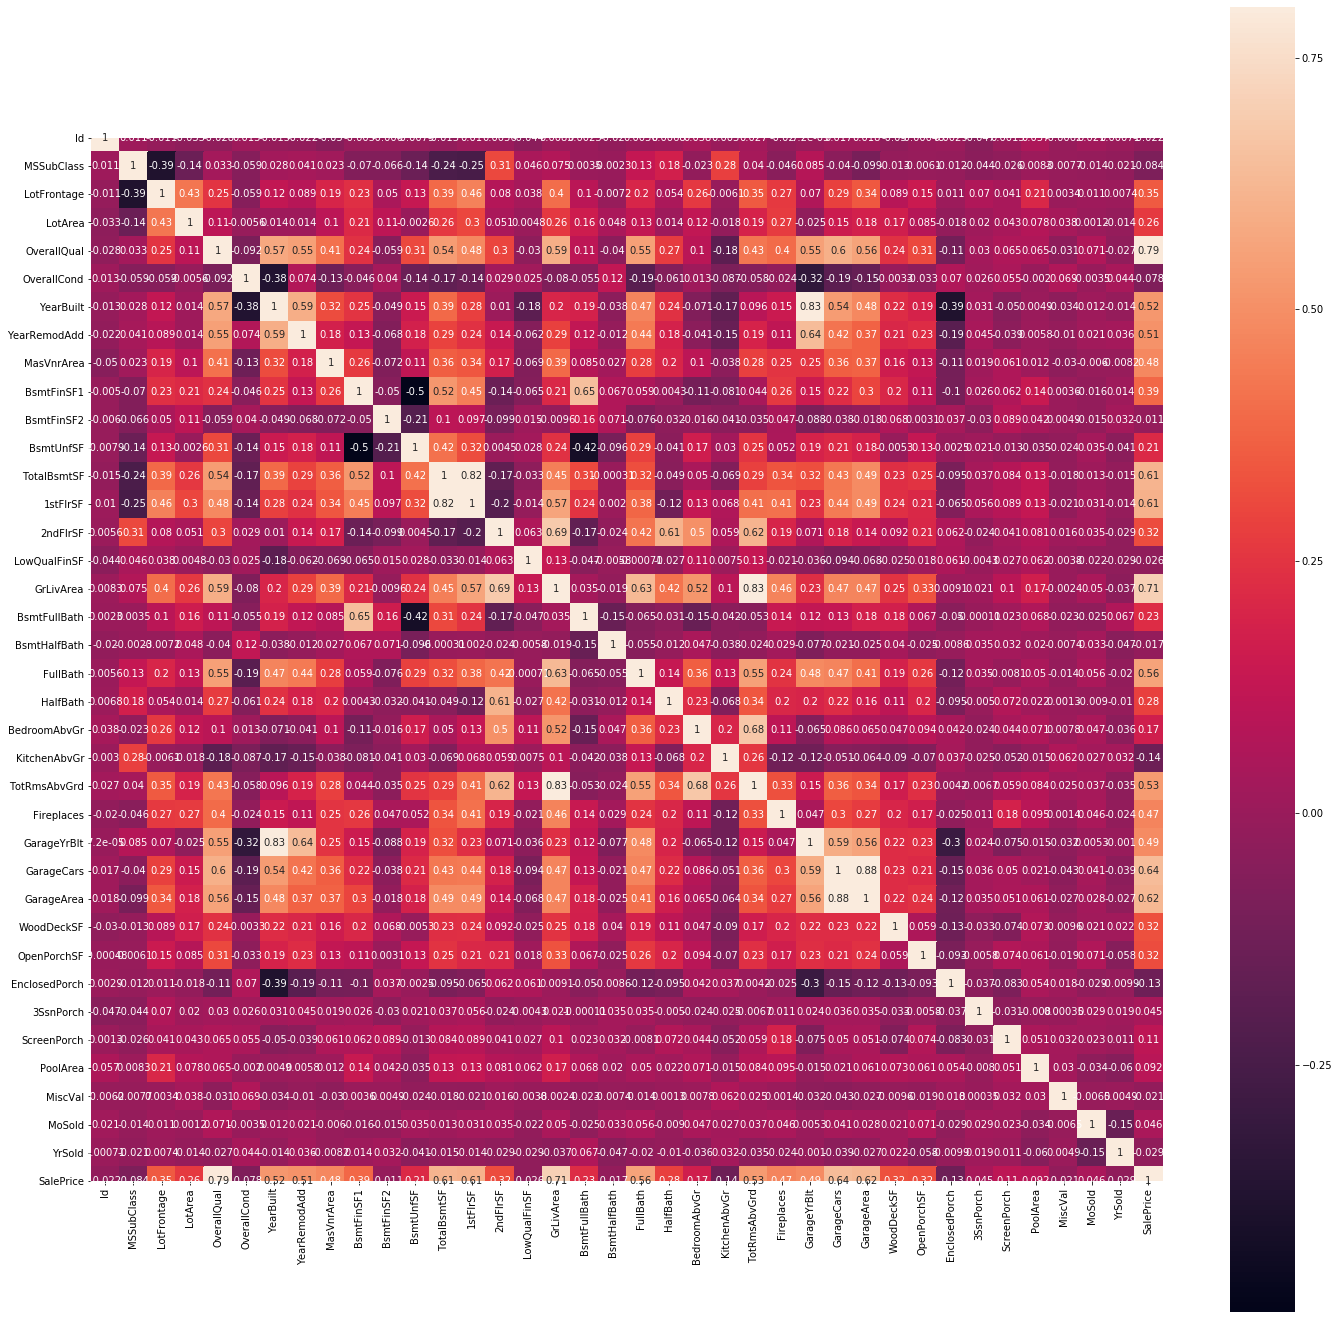

In [13]:
cor = train_data.corr()
plt.subplots(figsize=(24, 24))
sns.heatmap(cor, vmax=.8, square=True, annot = True);

In [14]:
print("high correlation value:\n")
for i in train_data.select_dtypes(exclude=['object']):
    for j in train_data.select_dtypes(exclude=['object']):
        if abs(train_data.corr().loc[i,j])>0.7 and i != j:
            print(i,j,train_data.corr().loc[i,j]*100)

high correlation value:

OverallQual SalePrice 79.09816005838047
YearBuilt GarageYrBlt 82.56674841743434
TotalBsmtSF 1stFlrSF 81.95299750050356
1stFlrSF TotalBsmtSF 81.95299750050356
GrLivArea TotRmsAbvGrd 82.54893743088377
GrLivArea SalePrice 70.86244776126512
TotRmsAbvGrd GrLivArea 82.54893743088377
GarageYrBlt YearBuilt 82.56674841743434
GarageCars GarageArea 88.24754142814602
GarageArea GarageCars 88.24754142814602
SalePrice OverallQual 79.09816005838047
SalePrice GrLivArea 70.86244776126512


Here I only see the correlation of numerical features.  
SalePrice is highly related to OverallQual and GrLivArea. This is great!  
TotalBsmtSF is highly related to 1stFlrSF, but I don't know why.   
GrLivArea is highly related to TotRmsAbvGrd, since the larger area above ground is, more rooms exists.   
GarageYrBlt is highly related to YearBuilt, since the garages are most likely built with bulidings.  
GarageCars is highly related to GarageArea, since how big the garage is, how many cars stop.  
According the above and relation with SalePrice, I drop TotRmsAbvGrd, GarageYrBlt, GarageArea.

In [15]:
X_num = X_num.drop(['TotRmsAbvGrd','GarageYrBlt','GarageArea'],axis = 1)
num_test = num_test.drop(['TotRmsAbvGrd','GarageYrBlt','GarageArea'],axis = 1)

In [16]:
pd.set_option('display.max_rows',10)

In [17]:
print("low correlation value with SalePrice:\n")
lowlist = []
for i in train_data.select_dtypes(exclude=['object']):
    if abs(train_data.corr().loc[i,'SalePrice'])<0.1:
            print(i,train_data.corr().loc[i,'SalePrice']*100)
            lowlist.append(i)

low correlation value with SalePrice:

Id -2.191671944343111
MSSubClass -8.428413512659523
OverallCond -7.78558940486776
BsmtFinSF2 -1.1378121450215215
LowQualFinSF -2.560613000068015
BsmtHalfBath -1.6844154297359293
3SsnPorch 4.458366533574791
PoolArea 9.240354949187278
MiscVal -2.118957964030379
MoSold 4.643224522381936
YrSold -2.8922585168730426


In [18]:
lowlist.remove('Id')
X_num = X_num.drop(lowlist, axis = 1)
num_test = num_test.drop(lowlist, axis = 1)

In [19]:
[x for x in X_num.columns if X_num[x].isnull().sum()>0]

['LotFrontage', 'MasVnrArea']

In [20]:
X_num['MasVnrArea'].fillna(0)
num_test['MasVnrArea'].fillna(0)
X_num = X_num.drop('LotFrontage',axis = 1) #since I could not understand the meaning of LotFrontage
num_test = num_test.drop('LotFrontage',axis = 1)

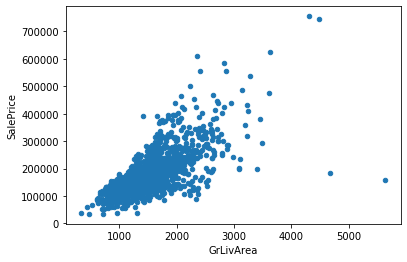

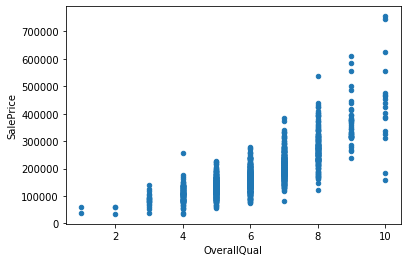

In [21]:
for var in ['GrLivArea','OverallQual']:
    data = pd.concat([train_data['SalePrice'], X_num[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice');

In [22]:
outliers = [x for x in range(1460) if X_num.loc[x,'GrLivArea']>4000 and train_data.loc[x,'SalePrice']<300000]
for i in outliers:
    print(train_data.loc[i,['GrLivArea','MSZoning','SalePrice']])

GrLivArea      4676
MSZoning         RL
SalePrice    184750
Name: 523, dtype: object
GrLivArea      5642
MSZoning         RL
SalePrice    160000
Name: 1298, dtype: object


These two outliners are all in Residential Low Density.

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [23]:
train_X_ver1 = X_num[['GrLivArea','OverallQual']]
y_ver1 = y.copy()

preprocessor = ColumnTransformer(transformers=[('num',StandardScaler(),['GrLivArea','OverallQual'])])
model = SVR(kernel = "linear", C=10000)
my_pipe = Pipeline(steps=[('preprocessor',preprocessor),('model',model)])
scores =-1*cross_val_score(my_pipe,train_X_ver1,y_ver1,cv=5,scoring='neg_mean_absolute_error')
print(scores)
print(sum(scores)/len(scores))

[26734.21884819 29466.20533525 29275.92442262 26198.06331286
 30136.31754172]
28362.145892125147


In [24]:
X_test_ver1 = test_data[['GrLivArea','OverallQual']]
model.fit(train_X_ver1,y_ver1)
y_test_ver1 = model.predict(X_test_ver1)

In [25]:
submission = pd.DataFrame({"Id":test_data['Id'],"SalePrice":y_test_ver1})
submission.to_csv('housing_submission_ver1.csv', index = False)

The score of sample by Kaggle is 0.40890  
The score of ver1 is 0.23708

In [24]:
X_num.columns

Index(['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch'],
      dtype='object')

In [25]:
dropnumcols = ['BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','BsmtFullBath','BedroomAbvGr','KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch']
X_num = X_num.drop(dropnumcols,axis=1)
num_test = num_test.drop(dropnumcols,axis=1)

In [26]:
X_num['BathAbvGr'] = X_num['FullBath']+X_num['HalfBath']
X_num['OutSideArea'] = X_num['WoodDeckSF']+X_num['OpenPorchSF']
X_num = X_num.drop(['FullBath','HalfBath', 'WoodDeckSF', 'OpenPorchSF'], axis = 1)
num_test['BathAbvGr'] = num_test['FullBath']+num_test['HalfBath']
num_test['OutSideArea'] = num_test['WoodDeckSF']+num_test['OpenPorchSF']
num_test = num_test.drop(['FullBath','HalfBath', 'WoodDeckSF', 'OpenPorchSF'], axis = 1)

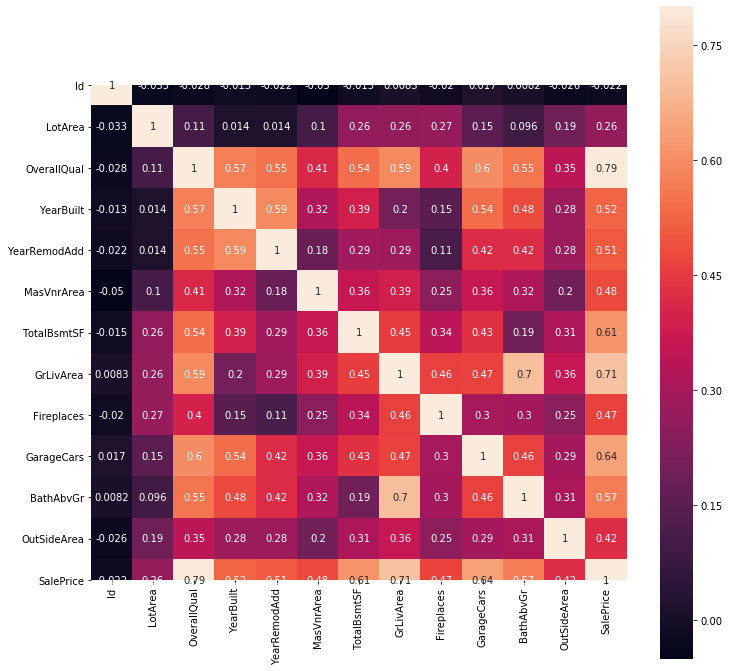

In [27]:
hmap = X_num.join(y)
cor = hmap.corr()
plt.subplots(figsize=(12, 12))
sns.heatmap(cor, vmax=.8, square=True, annot = True);

In [28]:
def checknull(df):
    return print([x for x in df.columns if df[x].isnull().sum()>0])
checknull(X_cat)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [29]:
nullfeatures = [x for x in X_cat.columns if X_cat[x].isnull().sum()>0]
nullfeatures.remove('Electrical')
for var in nullfeatures:
    X_cat[var] = X_cat[var].fillna('None')
    cat_test[var] = cat_test[var].fillna('None')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [30]:
X_cat['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [31]:
X_cat['Electrical'] = X_cat['Electrical'].fillna('SBrkr')
cat_test['Electrical'] = cat_test['Electrical'].fillna('SBrkr')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
checknull(X_cat)

[]


In [33]:
catcols = X_cat.columns.tolist()
print(catcols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit_transform(X_cat)
cat_test = pd.DataFrame(imputer.transform(cat_test), columns = cat_test.columns)
checknull(cat_test)

[]


In [35]:
from sklearn.preprocessing import LabelEncoder
laen = LabelEncoder()
for col in catcols:
    X_cat[col] = laen.fit_transform(X_cat[col])
    cat_test[col] = laen.transform(cat_test[col])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
print("low correlation value with SalePrice:\n")
lowlist = []
lowcorr = X_cat.join(y)
for i in lowcorr.columns:
    if abs(lowcorr.corr().loc[i,'SalePrice'])<0.1:
            print(i,lowcorr.corr().loc[i,'SalePrice']*100)
            lowlist.append(i)

low correlation value with SalePrice:

Street 4.103553550004989
Alley 8.312112052038152
LandContour 1.545324166096035
Utilities -1.431429614724895
LotConfig -6.739602315941719
LandSlope 5.1152248179465865
Condition1 9.115491154092926
Condition2 0.7512734036333074
BldgType -8.559060818352894
MasVnrType 1.821577126165887
BsmtCond 9.150303200495925
BsmtFinType1 -9.873436814720812
BsmtFinType2 7.271749455212063
Heating -9.88120759975766
FireplaceQu -9.717638681344758
MiscFeature -6.631614899148028
SaleType -5.491147712871259


In [37]:
print("high correlation value:\n")
for i in lowcorr.columns:
    for j in lowcorr.columns:
        if abs(lowcorr.corr().loc[i,j])>0.7 and i != j:
            print(i,j,lowcorr.corr().loc[i,j]*100)

high correlation value:

Exterior1st Exterior2nd 85.4162983732593
Exterior2nd Exterior1st 85.4162983732593


In [38]:
X_cat = X_cat.drop(lowlist, axis=1)
cat_test = cat_test.drop(lowlist, axis = 1)

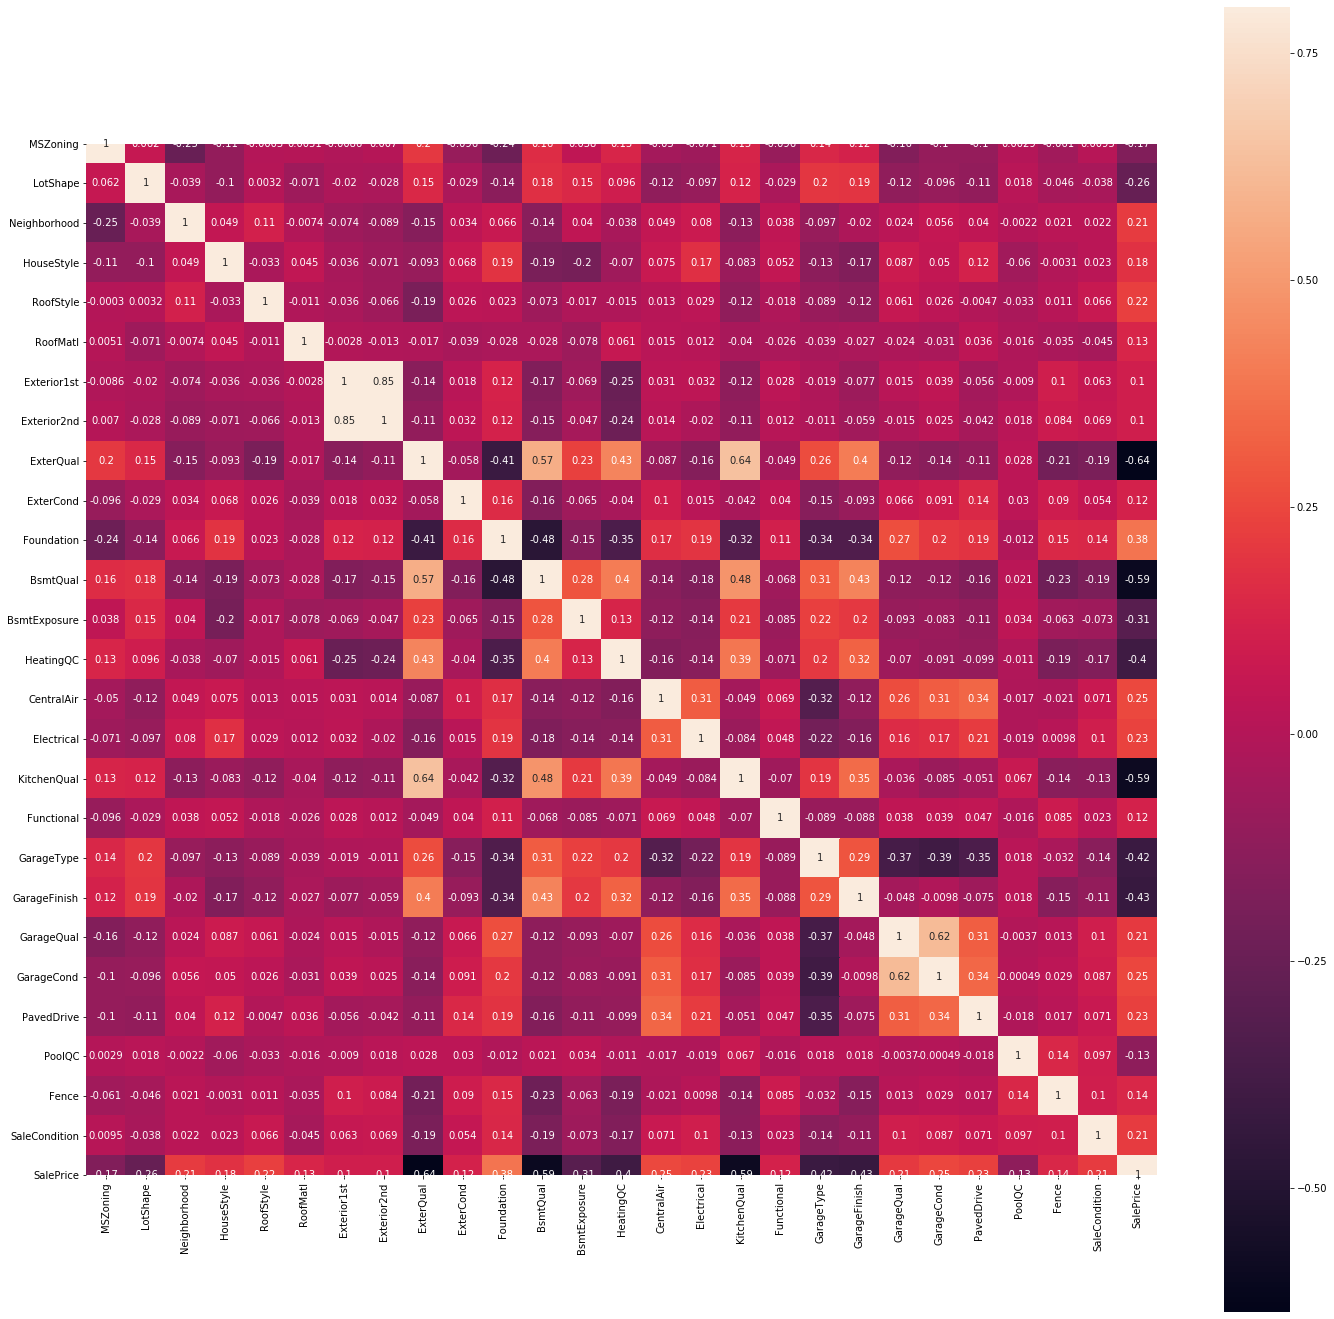

In [39]:
hmap = X_cat.join(y)
cor = hmap.corr()
plt.subplots(figsize=(24, 24))
sns.heatmap(cor, vmax=.8, square=True, annot = True);

In [40]:
X_cat = X_cat.drop('Exterior2nd', axis=1)
cat_test = cat_test.drop('Exterior2nd', axis=1)
X_num = X_num.drop('Id',axis=1)
num_test = num_test.drop('Id',axis=1)

In [41]:
X_train = pd.concat([X_cat,X_num],axis = 1)
X_test = pd.concat([cat_test, num_test],axis=1)

In [42]:
checknull(X_test)

['MasVnrArea', 'TotalBsmtSF', 'GarageCars']


In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
nullfeatures = ['MasVnrArea', 'TotalBsmtSF', 'GarageCars', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
freqfeatures = ['MSZoning', 'Exterior1st', 'Functional']
for var in nullfeatures:
    if X_test[var].dtype == dtype('O'):
        X_test[var] = X_test[var].fillna('None')
checknull(X_test)
X_test.head(2)

['MasVnrArea', 'TotalBsmtSF', 'GarageCars']


,MSZoning,LotShape,Neighborhood,HouseStyle,RoofStyle,RoofMatl,Exterior1st,ExterQual,ExterCond,Foundation,...,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,BathAbvGr,OutSideArea
0,2,3,12,2,1,1,12,3,4,1,...,5,1961,1961,0.0,882.0,896,0,1.0,1,140
1,3,0,12,2,3,1,13,3,4,1,...,6,1958,1958,108.0,1329.0,1329,0,1.0,2,429


In [44]:
num_cols = X_test.select_dtypes(exclude=['object']).columns
cat_cols = X_test.select_dtypes(include=['object']).columns
num_transformer = SimpleImputer(strategy='constant', fill_value = 0)
cat_transformer = SimpleImputer(strategy='most_frequent')
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer,cat_cols),('num',num_transformer,num_cols)])
X_test = pd.DataFrame(preprocessor.fit_transform(X_test), columns = X_test.columns)
X_test.head(2)

,MSZoning,LotShape,Neighborhood,HouseStyle,RoofStyle,RoofMatl,Exterior1st,ExterQual,ExterCond,Foundation,...,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,BathAbvGr,OutSideArea
0,2.0,3.0,12.0,2.0,1.0,1.0,12.0,3.0,4.0,1.0,...,5.0,1961.0,1961.0,0.0,882.0,896.0,0.0,1.0,1.0,140.0
1,3.0,0.0,12.0,2.0,3.0,1.0,13.0,3.0,4.0,1.0,...,6.0,1958.0,1958.0,108.0,1329.0,1329.0,0.0,1.0,2.0,429.0


In [45]:
encoder = LabelEncoder()
for col in cat_cols:
    X_test[col] = encoder.fit_transform(X_test[col])
X_test.head(2)

,MSZoning,LotShape,Neighborhood,HouseStyle,RoofStyle,RoofMatl,Exterior1st,ExterQual,ExterCond,Foundation,...,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,BathAbvGr,OutSideArea
0,2.0,3.0,12.0,2.0,1.0,1.0,12.0,3.0,4.0,1.0,...,5.0,1961.0,1961.0,0.0,882.0,896.0,0.0,1.0,1.0,140.0
1,3.0,0.0,12.0,2.0,3.0,1.0,13.0,3.0,4.0,1.0,...,6.0,1958.0,1958.0,108.0,1329.0,1329.0,0.0,1.0,2.0,429.0


In [46]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X_train, y, random_state=0)
model = XGBRegressor(n_estimators = 1000, learning_rate = 0.1, n_jobs = -1)
model.fit(train_X, train_y,early_stopping_rounds = 10, eval_set=[(val_X,val_y)],eval_metric = 'mae',verbose = False)

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:36:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [47]:
X_test.head(2)
y_test = model.predict(X_test)
submission = pd.DataFrame({"Id":test_data['Id'],"SalePrice":y_test})
submission.to_csv('housing_submission.csv', index = False)